## Task 06: Data Exploration and Feature Engineering

### 1. Import Data

Import libraries: 

In [1]:
# install libraries
#%pip instal pandas
#%pip install numpy
#%pip install scipy
#%pip install matplotlib
#%pip install seaborn

In [2]:
import pandas as pd
import numpy as np

Load the data and store it in dataframe `df`:

In [3]:
path='data/03_clean_dataset_concrete_data.csv'
df = pd.read_csv(path)
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### 2. Data Exploration

Concrete Compressive Strength & Age Relationship:

<img src='img/age_strength.png' width=600px>

In [4]:
df['Age'].unique

<bound method Series.unique of 0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: Age, Length: 1030, dtype: int64>

#### Bins Visualization
Normally, a histogram is used to visualize the distribution of bins we created above. 

Text(0.5, 1.0, 'Age bins')

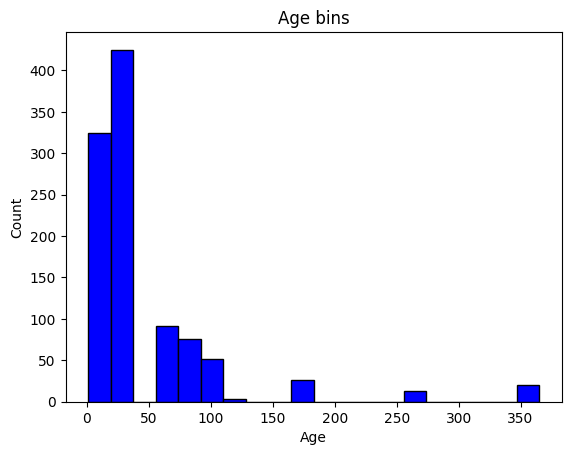

In [5]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "age" with bins = 1, 3, 7, 14, 21, 28, 365
# plt.pyplot.hist(df["Age"], bins=[1, 27, 366], edgecolor="black", color="blue")
plt.pyplot.hist(df["Age"], bins=20, edgecolor="black", color="blue")

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Age bins")

We build a bin array with a minimum value to a maximum value by using the bandwidth. The values will determine when one bin ends and another begins.

In [6]:
bins = [1, 6, 27, 365]
bins

[1, 6, 27, 365]

 We set group  names:

In [7]:
# Young < 7 days
# Middle < 28 days
# Old >= 28 days
group_names = ['Young', 'Middle', 'Old']

 We apply the function "cut" to determine what each value of `df['Age']` belongs to.

In [8]:
df['Age-binned'] = pd.cut(df['Age'], bins, labels=group_names, include_lowest=True )
df[['Age','Age-binned']].head()

,Age,Age-binned
0,28,Old
1,28,Old
2,270,Old
3,365,Old
4,360,Old


Let's see the number of samples in each bin:

In [9]:
df["Age-binned"].value_counts()

Age-binned
Old       706
Middle    188
Young     136
Name: count, dtype: int64

Let's plot the distribution of each bin:

Text(0.5, 1.0, 'Age bins')

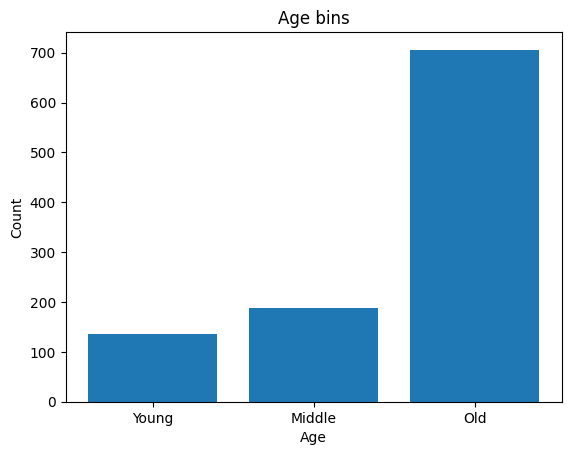

In [10]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df["Age-binned"].value_counts(sort=False))

# set x/y labels and plot title
plt.pyplot.xlabel("Age")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Age bins")

Let's reduce our dataset only on 'Old' age concrete samples:

In [11]:
df_reduced = df[df['Age-binned'] == 'Old']
df_reduced.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,Age-binned
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,Old
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,Old
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,Old
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,Old
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,Old


Drop column Age-Binned:

In [12]:
df_reduced = df_reduced.drop(['Age-binned', 'Age'], axis=1)
df_reduced.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.30


### 3. Analyzing Individual Feature Patterns Using Visualization

For example, we can calculate the correlation between predictors using the method "corr" for reduced dataset:

In [13]:
correlation = df_reduced.corr()
correlation

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
Cement,1.000000,-0.296891,-0.433957,-0.072390,0.028730,-0.068185,-0.204883,0.602852
Blast Furnace Slag,-0.296891,1.000000,-0.295066,0.105146,0.056609,-0.282217,-0.269720,0.156719
Fly Ash,-0.433957,-0.295066,1.000000,-0.216366,0.392019,-0.054670,0.067571,-0.231160
Water,-0.072390,0.105146,-0.216366,1.000000,-0.620311,-0.232163,-0.478430,-0.372597
Superplasticizer,0.028730,0.056609,0.392019,-0.620311,1.000000,-0.256060,0.223091,0.299143
Coarse Aggregate,-0.068185,-0.282217,-0.054670,-0.232163,-0.256060,1.000000,-0.147193,-0.070553
Fine Aggregate,-0.204883,-0.269720,0.067571,-0.478430,0.223091,-0.147193,1.000000,-0.115609
Strength,0.602852,0.156719,-0.231160,-0.372597,0.299143,-0.070553,-0.115609,1.000000


We can calculate the correlation between Age and Strength using the method "corr" for whole dataset:

In [14]:
df[['Age', 'Strength']].corr()

,Age,Strength
Age,1.000000,0.328873
Strength,0.328873,1.000000


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

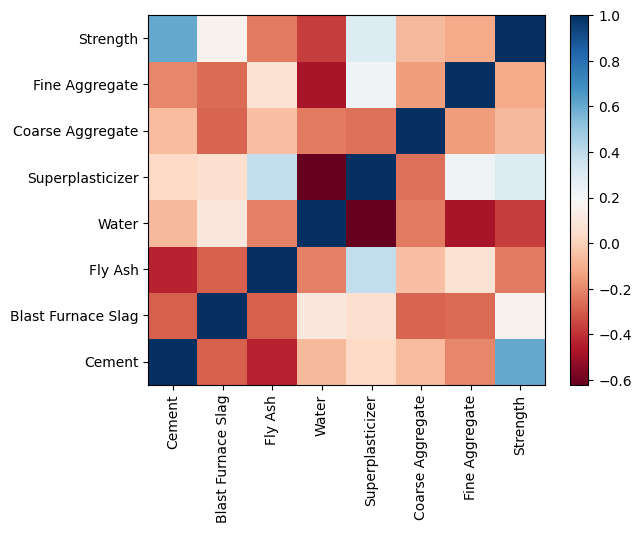

In [16]:
fig, ax = plt.subplots()
im = ax.pcolor(correlation, cmap='RdBu')

#label names
row_labels = correlation.columns
col_labels = correlation.index

#move ticks and labels to the center
ax.set_xticks(np.arange(correlation.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(correlation.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h4>Positive Linear Relationship</h4>

Let's find the scatterplot of "Cement" and "Strength".

(0.0, 86.303)

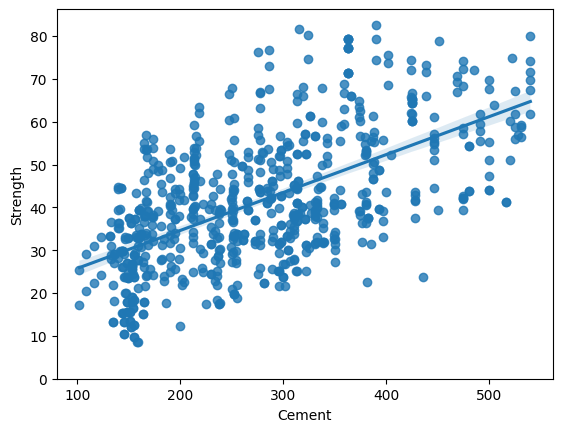

In [17]:
# Cement as potential predictor variable of Strength
sns.regplot(x="Cement", y="Strength", data=df_reduced)
plt.ylim(0,)

<p>As the Cement goes up, the Strength goes up: this indicates a positive direct correlation between these two variables. Cement seems like a pretty good predictor of strength since the regression line is almost a perfect diagonal line.</p>

 We can examine the correlation between 'Cement' and 'Strength' and see that it's approximately 0.603

In [18]:
df_reduced[["Cement", "Strength"]].corr()

,Cement,Strength
Cement,1.000000,0.602852
Strength,0.602852,1.000000


<h4>Inverse/negative Relationship</h4>

Let's find the scatterplot of "Water" and "Strength".

(0.0, 86.303)

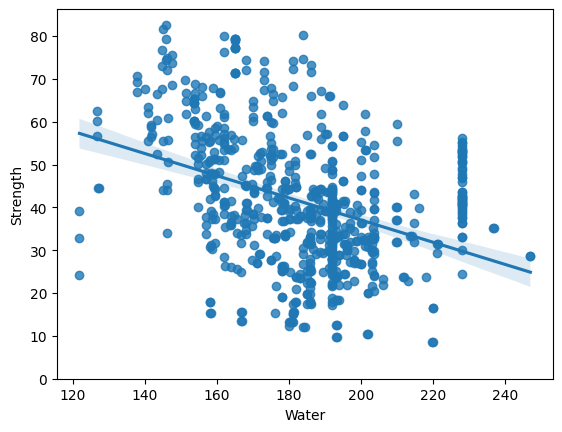

In [19]:
# Water as potential predictor variable of Strength
sns.regplot(x="Water", y="Strength", data=df_reduced)
plt.ylim(0,)

<p>As the Water goes down, the Strength goes up: this indicates a negative direct correlation between these two variables. Water could potentially be a predictor of strength.</p>

 We can examine the correlation between 'Water' and 'Strength' and see that it's approximately -0.373

In [20]:
df_reduced[["Water", "Strength"]].corr()

,Water,Strength
Water,1.000000,-0.372597
Strength,-0.372597,1.000000


<h4>Weak Linear Relationship</h4>

Let's find the scatterplot of "Coarse Aggregate" and "Strength".

(0.0, 86.303)

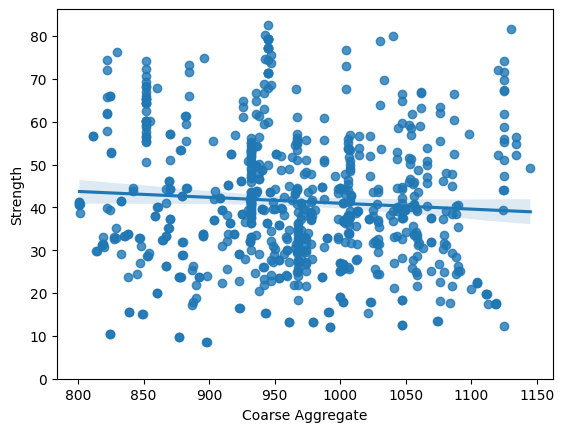

In [21]:
# Coarse Aggregate as potential predictor variable of Strength
sns.regplot(x="Coarse Aggregate", y="Strength", data=df_reduced)
plt.ylim(0,)

<p>Coarse Aggregate does not seem like a good predictor of the Strength at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore, it's not a reliable variable.</p>

 We can examine the correlation between 'Coarse Aggregate' and 'Strength' and see that it's approximately -0.071

In [22]:
df_reduced[["Coarse Aggregate", "Strength"]].corr()

,Coarse Aggregate,Strength
Coarse Aggregate,1.000000,-0.070553
Strength,-0.070553,1.000000


<h4>Categorical Variables</h4>

Let's look at the relationship between "Age" and "Strength".


<Axes: xlabel='Age-binned', ylabel='Strength'>

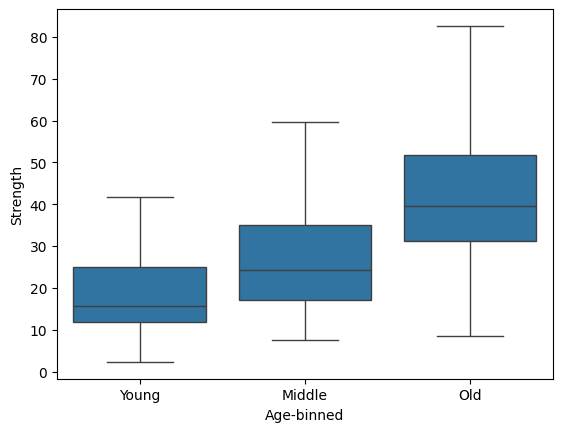

In [23]:
sns.boxplot(x="Age-binned", y="Strength", data=df)

<p>Here we see that the distribution of samples between the different Age categories differs. As such, Age could potentially be a predictor of price.</p>

<h3 id="discriptive_statistics">4. Descriptive Statistical Analysis</h3>

In [24]:
df_reduced.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,277.088244,77.065439,57.356941,182.966856,6.540510,965.469263,768.193343,41.452040
std,104.512149,85.245205,64.936442,22.097915,5.817023,78.724983,80.900807,15.352957
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,8.540000
25%,183.925000,0.000000,0.000000,167.000000,0.000000,923.000000,712.925000,31.135000
50%,269.400000,38.000000,0.000000,185.000000,7.000000,965.700000,777.500000,39.585000
75%,342.000000,145.000000,118.300000,193.675000,10.300000,1022.950000,821.000000,51.827500
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,82.600000


Text(0.5, 1.0, 'Fly Ash')

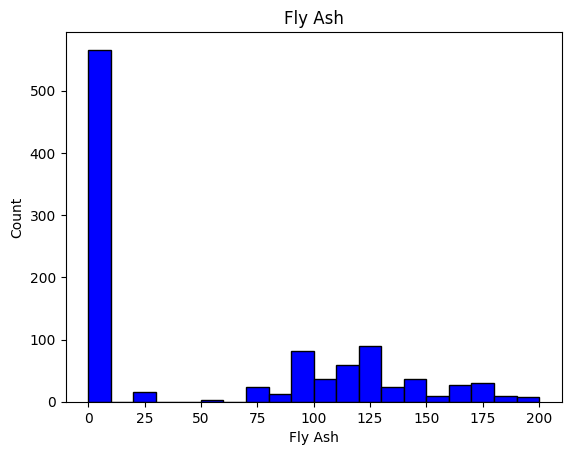

In [25]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "Fly Ash" with 20 bins
plt.pyplot.hist(df["Fly Ash"], bins=20, edgecolor="black", color="blue")

# set x/y labels and plot title
plt.pyplot.xlabel("Fly Ash")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Fly Ash")

We build a bin array with a minimum value to a maximum value by using the bandwidth. The values will determine when one bin ends and another begins.

In [26]:
bins_ash = [0, 1, 110, 200]
bins_ash

[0, 1, 110, 200]

 We set group  names:

In [27]:
# No ash
# Less ash <= 110
# More ash > 110
group_names_ash = ['No ash', 'Less ash', 'More ash']

 We apply the function "cut" to determine what each value of `df['Fly Ash']` belongs to.

In [28]:
df['Fly Ash-binned'] = pd.cut(df['Fly Ash'], bins_ash, labels=group_names_ash, include_lowest=True )
df[['Fly Ash','Fly Ash-binned']].head()

,Fly Ash,Fly Ash-binned
0,0.0,No ash
1,0.0,No ash
2,0.0,No ash
3,0.0,No ash
4,0.0,No ash


Let's see the number of samples in each bin:

In [29]:
df["Fly Ash-binned"].value_counts()

Fly Ash-binned
No ash      566
More ash    291
Less ash    172
Name: count, dtype: int64

Let's plot the distribution of each bin:

Text(0.5, 1.0, 'Fly Ash-binned')

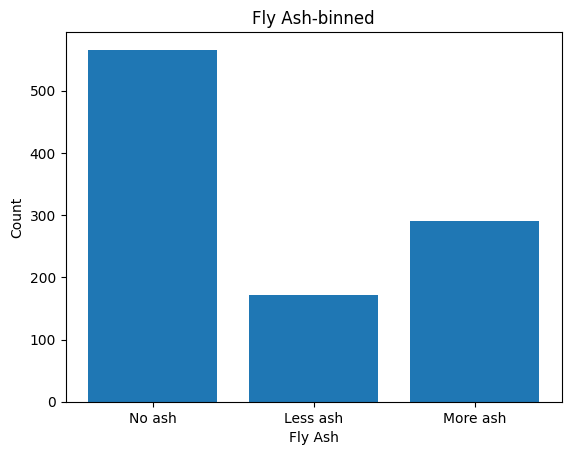

In [30]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names_ash, df["Fly Ash-binned"].value_counts(sort=False))

# set x/y labels and plot title
plt.pyplot.xlabel("Fly Ash")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Fly Ash-binned")

<Axes: xlabel='Fly Ash-binned', ylabel='Strength'>

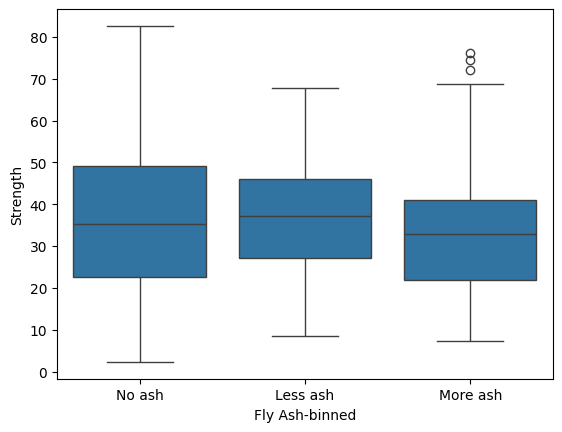

In [31]:
sns.boxplot(x="Fly Ash-binned", y="Strength", data=df)

Let's save the results to the dataframe "fly_ash_counts" and rename the column.

In [32]:
# Fly Ash-binned as variable
fly_ash_counts = df['Fly Ash-binned'].value_counts().to_frame()
fly_ash_counts.rename(columns={'count': 'value_counts'}, inplace=True)
fly_ash_counts.index.name = 'fly_ash'
fly_ash_counts.head(10)

,value_counts
fly_ash,
No ash,566
More ash,291
Less ash,172


<h3 id="basic_grouping">5. Grouping dataset</h3>

Let's group by the variable "Fly Ash-binned". We see that there are 3 different categories of Fly Ash.

In [33]:
df['Fly Ash-binned'].unique()

['No ash', 'Less ash', 'More ash', NaN]
Categories (3, object): ['No ash' < 'Less ash' < 'More ash']

Select the columns 'Fly Ash-binned' and 'Strength', then assign it to the variable "df_group_one".

In [34]:
df_group_one = df[['Fly Ash-binned', 'Strength']]
df_group_one.head()

,Fly Ash-binned,Strength
0,No ash,79.99
1,No ash,61.89
2,No ash,40.27
3,No ash,41.05
4,No ash,44.30


We can then calculate the average Strength for each of the different categories of data.

In [35]:
# grouping results
df_group_one = df_group_one.groupby(['Fly Ash-binned'], observed=True).mean()
df_group_one

,Strength
Fly Ash-binned,
No ash,36.771784
Less ash,37.347849
More ash,33.129725


<p>From our data, it seems more Fly ash are, on average, the less strength, while less Fly ash and No ash are approximately the same in strength.</p>

<p>You can also group by multiple variables. For example, let's group by both 'Fly Ash-binned' and 'Age-binned'. This groups the dataframe by the unique combination of 'Fly Ash-binned' and 'Age-binned'. We can store the results in the variable 'grouped_test1'.</p>

In [36]:
# grouping results
df_gptest = df[['Fly Ash-binned', 'Age-binned','Strength']]
grouped_test1 = df_gptest.groupby(['Fly Ash-binned', 'Age-binned'], observed=True, as_index=False).mean()
grouped_test1

,Fly Ash-binned,Age-binned,Strength
0,No ash,Young,19.400986
1,No ash,Middle,25.086341
2,No ash,Old,43.950914
3,Less ash,Young,19.618333
4,Less ash,Middle,32.858750
5,Less ash,Old,41.648226
6,More ash,Young,17.416585
7,More ash,Middle,29.042439
8,More ash,Old,37.014019


<p>This grouped data is much easier to visualize when it is made into a pivot table. 

<p>In this case, we will leave the Fly ash as the rows of the table, and pivot Age to become the columns of the table:</p>

In [37]:
grouped_pivot = grouped_test1.pivot(index='Fly Ash-binned',columns='Age-binned')
grouped_pivot

Strength                      
Age-binned          Young     Middle        Old
Fly Ash-binned                                 
No ash          19.400986  25.086341  43.950914
Less ash        19.618333  32.858750  41.648226
More ash        17.416585  29.042439  37.014019

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

<h4>Variables: Fly Ashes and Age vs. Price</h4>

Let's use a heat map to visualize the relationship between Fly Ash and Age vs Price.

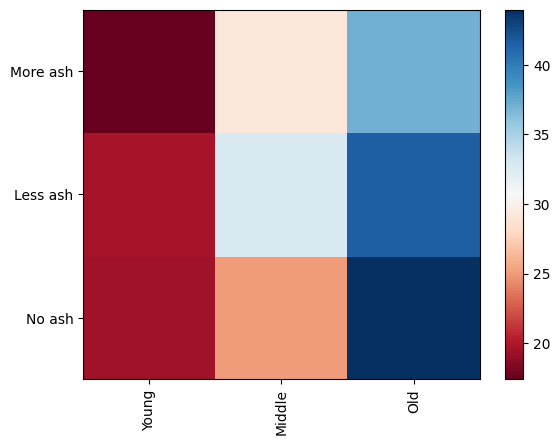

In [39]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

<h3 id="correlation_causation">6. Correlation and Causation</h3>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

In [40]:
df_reduced.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
Cement,1.000000,-0.296891,-0.433957,-0.072390,0.028730,-0.068185,-0.204883,0.602852
Blast Furnace Slag,-0.296891,1.000000,-0.295066,0.105146,0.056609,-0.282217,-0.269720,0.156719
Fly Ash,-0.433957,-0.295066,1.000000,-0.216366,0.392019,-0.054670,0.067571,-0.231160
Water,-0.072390,0.105146,-0.216366,1.000000,-0.620311,-0.232163,-0.478430,-0.372597
Superplasticizer,0.028730,0.056609,0.392019,-0.620311,1.000000,-0.256060,0.223091,0.299143
Coarse Aggregate,-0.068185,-0.282217,-0.054670,-0.232163,-0.256060,1.000000,-0.147193,-0.070553
Fine Aggregate,-0.204883,-0.269720,0.067571,-0.478430,0.223091,-0.147193,1.000000,-0.115609
Strength,0.602852,0.156719,-0.231160,-0.372597,0.299143,-0.070553,-0.115609,1.000000


<b>P-value</b>
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is < 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is < 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is < 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is > 0.1: there is no evidence that the correlation is significant.</li>
</ul>


 We can obtain this information using  "stats" module in the "scipy"  library.


In [41]:
from scipy import stats

In [42]:
df_reduced.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Strength'],
      dtype='object')

<h4>Cement vs. Strength</h4>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'Cement' and 'Strength'.

In [43]:
pearson_coef, p_value = stats.pearsonr(df_reduced['Cement'], df_reduced['Strength'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.6028520262013922  with a P-value of P = 4.4712922958419e-71


<p>Since the p-value is < 0.001, the correlation between Cement and Strength is statistically significant, the linear relationship is strong. (~0.602).</p>

Let's calculate P-value for each of predictors:

In [44]:
def p_value_features(df_1, df_2):
    pearson_coef, p_value = stats.pearsonr(df_1, df_2)
    print(f"{df_1.name} vs. {df_2.name}:")
    print(f"The Pearson Correlation Coefficient is {pearson_coef:.6f} with a P-value of P is {p_value}")
    print(f"{'*'*20}")

In [45]:
for col in df_reduced.columns[:-1]:
    p_value_features(df_reduced[col], df_reduced[df_reduced.columns[-1]])

Cement vs. Strength:
The Pearson Correlation Coefficient is 0.602852 with a P-value of P is 4.4712922958419e-71
********************
Blast Furnace Slag vs. Strength:
The Pearson Correlation Coefficient is 0.156719 with a P-value of P is 2.8816088694346633e-05
********************
Fly Ash vs. Strength:
The Pearson Correlation Coefficient is -0.231160 with a P-value of P is 5.113964693542763e-10
********************
Water vs. Strength:
The Pearson Correlation Coefficient is -0.372597 with a P-value of P is 1.1339327194784266e-24
********************
Superplasticizer vs. Strength:
The Pearson Correlation Coefficient is 0.299143 with a P-value of P is 4.622593012321614e-16
********************
Coarse Aggregate vs. Strength:
The Pearson Correlation Coefficient is -0.070553 with a P-value of P is 0.06097691750407949
********************
Fine Aggregate vs. Strength:
The Pearson Correlation Coefficient is -0.115609 with a P-value of P is 0.002093156127508699
********************


<h3 id="anova">7. ANOVA</h3>

<h4>ANOVA: Analysis of Variance (Analýza rozptylu)</h4>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<h4>Fly Ash</h4>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'Fly Ash' impact  'Strength', we group the data.</p>

In [46]:
grouped_test2 = df_gptest[['Fly Ash-binned', 'Strength']].groupby(['Fly Ash-binned'], observed=True)
grouped_test2.head(2)

,Fly Ash-binned,Strength
0,No ash,79.99
1,No ash,61.89
184,Less ash,11.58
185,Less ash,24.45
199,More ash,15.04
200,More ash,21.06


In [47]:
df_gptest

,Fly Ash-binned,Age-binned,Strength
0,No ash,Old,79.99
1,No ash,Old,61.89
2,No ash,Old,40.27
3,No ash,Old,41.05
4,No ash,Old,44.30
...,...,...,...
1025,Less ash,Old,44.28
1026,More ash,Old,31.18
1027,Less ash,Old,23.70
1028,No ash,Old,32.77


 We can obtain the values of the method group using the method "get_group".  


In [48]:
grouped_test2.get_group('No ash')['Strength']

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1015    52.43
1020    42.14
1023    39.46
1024    37.92
1028    32.77
Name: Strength, Length: 566, dtype: float64

We can use the function 'f_oneway' in the module 'stats' to obtain the <b>F-test score</b> and <b>P-value</b>.


In [49]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('No ash')['Strength'],
                              grouped_test2.get_group('Less ash')['Strength'],
                              grouped_test2.get_group('More ash')['Strength'],
                              )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 5.460494286675287 , P = 0.00437592445650424


This is a good result with a big F-test score showing a strong correlation and a small P-value implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

#### No ash and Less ash

In [50]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('No ash')['Strength'],
                              grouped_test2.get_group('Less ash')['Strength'],
                              )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.14590269752240992 , P = 0.7025923069047414


#### No ash and More ash

In [51]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('No ash')['Strength'],
                              grouped_test2.get_group('More ash')['Strength'],
                              )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.543450581075676 , P = 0.003559119637403343


#### More ash and Less ash

In [52]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('Less ash')['Strength'],
                              grouped_test2.get_group('More ash')['Strength'],
                              )  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 9.690745890378576 , P = 0.0019671719661619636


We notice that ANOVA for the categories `No ash` and `Less ash` yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.

<h3>Conclusion: Important Variables</h3>

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Cement</li>
    <li>Water</li>
    <li>Superplasticizer</li>
    <li>Fly Ash</li>
    <li>Blast Furnace</li>
</ul>
    
Categorical variables:
<ul>
    <li>Age</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

### Sources:

#### Author/Date/Organization


###### Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-10-21 | 1.1 | Vjaceslav Usmanov| added task_06.csv |
| 2023-10-22 | 1.2 | Vjaceslav Usmanov| changed Task_06.ipynb |
